In [1]:
import pydot
import matplotlib.pyplot as plt
import math
import networkx as nx
import random

# Uploading the data

In [2]:
def get_data(dot_file_path):
     #= 'Datasets/LesMiserables.dot'
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()

    graph = pydot.graph_from_dot_data(dot_data)

    nodes = graph[0].get_nodes()
    edges = graph[0].get_edges()

    node_list = [node.get_name() for node in nodes]
    edge_list = [(edge.get_source(), edge.get_destination()) for edge in edges]
    #print(edge_list)
    return nodes,edges,node_list,edge_list
#graget_data('Datasets/LesMiserables.dot')
nodes,edges,node_list,edge_list = get_data('Datasets/LesMiserables.dot')
print(('1','40') in edge_list)
#print(get_data('Datasets/LesMiserables.dot')[3])

False


# Tree Layout

### Counting the number of children/parents for each node

In [3]:
#COUNTING THE NUMBER OF CHILD NODES FOR EACH NODE
def f_childs(file_name):   
    nodes = get_data(file_name)[0]
    edges = get_data(file_name)[1]
    node_child_count = {node.get_name(): 0 for node in nodes}
    node_childs = {node.get_name(): [] for node in nodes}
    for edge in edges:
        source = edge.get_source()
        destination = edge.get_destination()
        if source in node_child_count:
            node_child_count[source] += 1 
            node_childs[source].append(destination) #comment
    return node_child_count, node_childs

#Count
#print(f_childs('Datasets/LesMiserables.dot')[0])
#List      
#print(f_childs('Datasets/LesMiserables.dot')[1])

def f_parents(file_name):
    nodes = get_data(file_name)[0]
    edges = get_data(file_name)[1]
    node_parent_count = {node.get_name(): 0 for node in nodes}
    node_parents = {node.get_name(): [] for node in nodes}
    for edge in edges:
        source = edge.get_source()
        destination = edge.get_destination()
        if destination in node_parent_count:
            node_parent_count[destination] += 1 
            node_parents[destination].append(source)
    return node_parent_count, node_parents

#Count
#print(f_parents('Datasets/LesMiserables.dot')[0])
#List      
#print(f_parents('Datasets/LesMiserables.dot')[1])

### Get the nodes that have the same parent and are directly connected to each other

I'm trying to get a better tree layout, but I think the one we have now is good enough for now

In [4]:
nodes,edges,node_list,edge_list = get_data('Datasets/LesMiserables.dot')
#ans = []
ans = {edge.get_source(): [] for edge in edges}
for edge1 in edges:
    for edge2 in edges:
        if edge1.get_source() == edge2.get_source() and edge1.get_destination() != edge2.get_destination() and (str(edge1.get_destination()),str(edge2.get_destination())) in edge_list:# and str(edge1.get_destination()) not in ans:
            #ans.append((str(edge1.get_destination()),str(edge2.get_destination())))
            #ans[edge1.get_source()] = []
            ans[edge1.get_source()].append((str(edge1.get_destination()),str(edge2.get_destination())))
ans

{'1': [],
 '2': [('3', '4'), ('3', '11'), ('4', '11')],
 '3': [('4', '11')],
 '4': [],
 '11': [('13', '24'),
  ('24', '25'),
  ('24', '26'),
  ('24', '28'),
  ('24', '30'),
  ('24', '32'),
  ('25', '26'),
  ('25', '27'),
  ('25', '28'),
  ('25', '69'),
  ('25', '70'),
  ('25', '71'),
  ('26', '27'),
  ('26', '28'),
  ('26', '49'),
  ('26', '56'),
  ('26', '69'),
  ('26', '70'),
  ('26', '71'),
  ('26', '72'),
  ('27', '28'),
  ('27', '44'),
  ('27', '50'),
  ('27', '52'),
  ('27', '56'),
  ('27', '73'),
  ('28', '29'),
  ('28', '30'),
  ('28', '32'),
  ('28', '34'),
  ('28', '44'),
  ('28', '49'),
  ('28', '59'),
  ('28', '69'),
  ('28', '70'),
  ('28', '71'),
  ('28', '72'),
  ('28', '73'),
  ('29', '45'),
  ('30', '35'),
  ('30', '36'),
  ('30', '37'),
  ('30', '38'),
  ('30', '39'),
  ('35', '36'),
  ('35', '37'),
  ('35', '38'),
  ('35', '39'),
  ('36', '37'),
  ('36', '38'),
  ('36', '39'),
  ('37', '38'),
  ('37', '39'),
  ('38', '39'),
  ('49', '56'),
  ('49', '59'),
  ('49', '6

In [11]:
edges12 = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('A', 'D'), ('A', 'E'), ('E', 'F')]

# Initialize a dictionary to store the children of each parent
parent_children = {}
for parent, child in edges12:
    if parent in parent_children:
        parent_children[parent].append(child)
    else:
        parent_children[parent] = [child]

# Initialize a list to store nodes directly connected to each other and have the same parent
connected_nodes = []
for parent, children in parent_children.items():
    for child in children:
        if len(parent_children[child]) > 1:  # If the child has multiple connections
            connected_nodes.append((parent, child, parent_children[child]))

# Print the result
print("Nodes directly connected to each other and have the same parent:")
for node in connected_nodes:
    print(node)




KeyError: 'C'

In [12]:
# Assume nodes is a list of nodes and edges is a list of edges

# Create a dictionary to store the children of each parent node
childsq = f_childs(get_data('Datasets/LesMiserables.dot')[0],get_data('Datasets/LesMiserables.dot')[1])[1]
#print(parent_children)
# Populate the parent_children dictionary
#for edge in edge_list:
#    parent = edge[0]  # Assuming edge is a tuple (parent, child)
#    child = edge[1]
#    if parent in parent_children:
#        parent_children[parent].append(child)
#    else:
#        parent_children[parent] = [child]

# Initialize a list to store connected nodes
connected_nodes = []

#2-> parent 1
#3-> child 1
#4 -> child 2
#child 2 in node_childs[child1]

# Iterate through each edge and check if the source and destination nodes have a common parent



for edge in edge_list:
    parent1, child1 = edge
    for other_edge in edge_list:
        parent2, child2 = other_edge
        if parent1 in childsq[parent2]:
            connected_nodes.append((child2))

# connected_nodes now contains tuples of nodes connected to each other with a common parent
print(connected_nodes)

TypeError: f_childs() takes 1 positional argument but 2 were given

### Organizing the nodes throughout the graph, getting their coordinates for the tree layout

In [7]:
def tree_layout(file):
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    node_child_count = f_childs(file)[0]
    node_childs = f_childs(file)[1]
    
    for edge in edges:
        #print(edge)#.get_source())
    #    print(node_childs[str(edge.get_destination())])
        parent_x = node_positions[str(edge.get_source())][0]
        parent_y = node_positions[str(edge.get_source())][1]
        
        if len(node_childs[str(edge.get_source())]) == 1:# and int(edge.get_destination()) not in done_nodes:
            #print(edge)
            step = 3#random.choice([2,3])
            child_x = parent_x + step
            child_y = parent_y
            node_positions[edge.get_destination()] = (child_x, child_y)
            done_nodes.append(int(edge.get_destination()))
        
        
        elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
            if len(node_childs[str(edge.get_source())])%2 != 0:
                max_y = (node_child_count[str(edge.get_source())]-1)*3
            else:
                max_y = (node_child_count[str(edge.get_source())]-1)*3+1
            for child in node_childs[str(edge.get_source())]:
                step = 3#random.choice([2,3])
                child_x = parent_x + step
                child_y = parent_y + max_y
                node_positions[child] = (child_x, child_y)
                max_y -=8
                done_nodes.append(int(edge.get_destination()))
        
        elif len([done_node for done_node in done_nodes if done_node == edge.get_destination()])==1:
            child_x += 1
    return node_positions

print(tree_layout('Datasets/LesMiserables.dot'))
#f_childs(nodes,edges)[1]['17']

{'1': (0, 0), '2': (3, 0), '3': (6, 24), '4': (6, 16), '5': (6, 8), '6': (6, 0), '7': (6, -8), '8': (6, -16), '9': (6, -24), '10': (6, -32), '11': (9, 16), '12': (12, 112), '13': (12, 104), '14': (12, 96), '15': (12, 88), '16': (12, 80), '24': (15, 104), '25': (18, 84), '26': (21, 108), '27': (24, 144), '28': (27, 158), '29': (12, 32), '30': (18, 60), '32': (18, 44), '33': (12, 8), '34': (12, 0), '35': (12, -8), '36': (12, -16), '37': (12, -24), '38': (12, -32), '39': (15, -32), '44': (27, 150), '45': (15, 36), '49': (24, 96), '50': (27, 142), '52': (30, 146), '56': (33, 132), '59': (27, 126), '65': (27, 78), '69': (27, 54), '70': (27, 46), '71': (24, 64), '72': (27, 38), '73': (27, 110), '17': (18, 140), '18': (27, 166), '19': (18, 124), '20': (18, 116), '21': (18, 108), '22': (18, 100), '23': (21, 100), '31': (21, 44), '42': (24, 112), '43': (24, 104), '51': (30, 154), '40': (24, 128), '41': (24, 120), '76': (27, 14), '55': (33, 140), '46': (15, 28), '53': (27, 128), '58': (27, 134),

# Plot the graph

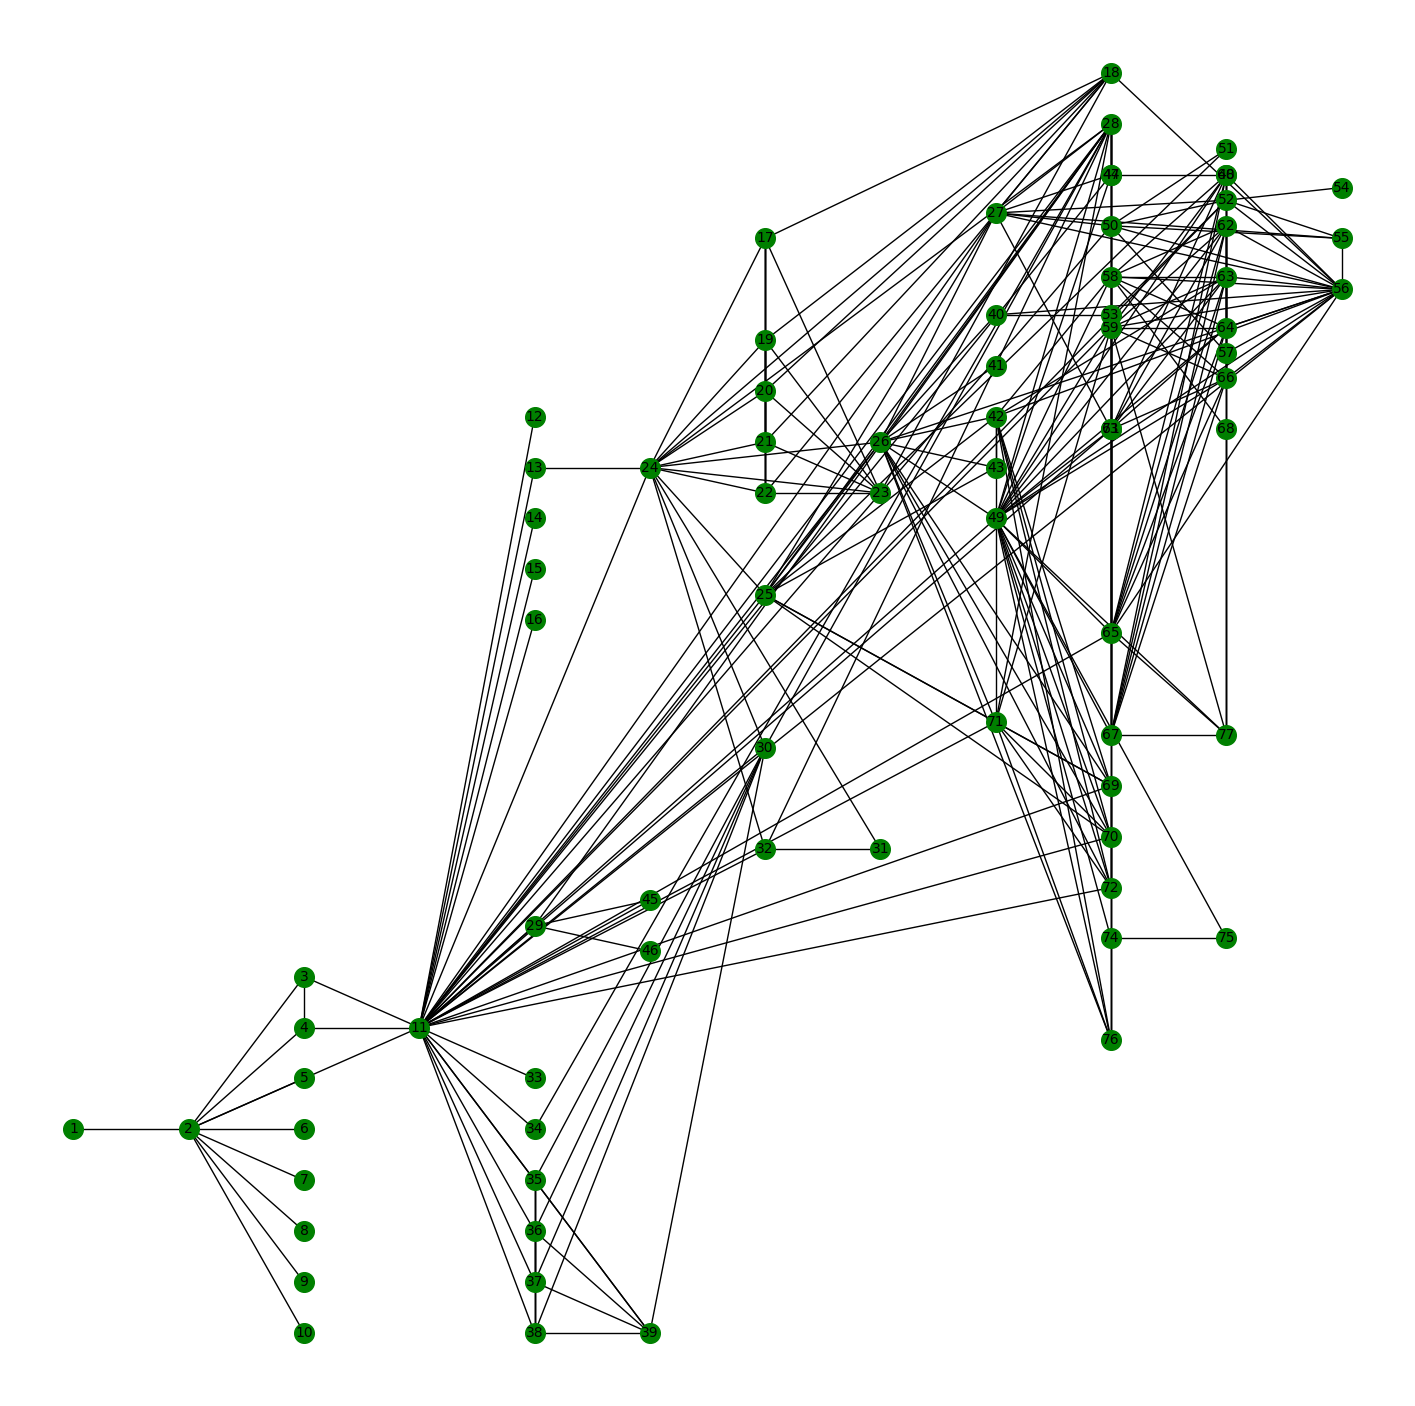

In [8]:
#HOW TO PLOT A GENERAL GRAPH
def show_graph(file,layout,dims):
    if layout == 'tree_layout':
        node_positions = tree_layout(file)
    nodes,edges = get_data(file)[0],get_data(file)[1]
    plt.figure(figsize=(dims[0], dims[1]))

    for edge in edges:
        start_node = edge.get_source()
        end_node = edge.get_destination()
        start_pos = node_positions[start_node]
        end_pos = node_positions[end_node]

        position = str(str(edge.get_attributes())).rfind(':')
        if int(position) != -1:
            w = int(str(edge.get_attributes())[position+3:-2])
            if w != 1:
                w = 1+w/10
        else:
            w=1
        #plt.scatter([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], color='black', s=10, linewidths=w)
        plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=1,zorder = 1) 

    for node, pos in node_positions.items():
        plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # Use marker='o' for circle markers
        plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
    plt.axis('off')
    plt.savefig(layout+'plot.png')
    plt.show()
    
show_graph('Datasets/LesMiserables.dot','tree_layout',(18,18))

# Radial Layout

### Sorting the nodes based on their degree

In [10]:
sorted_node_childs = sorted_dict = dict(sorted(node_childs.items(), key=lambda item: len(item[1]), reverse=True))

NameError: name 'node_childs' is not defined

In [ ]:
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}
done_nodes= []
lonely_nodes_h = 4
radius = 2

for node in sorted_node_childs.items():
    #for edge in edges:
    #print(edge)#.get_source())
#    print(node_childs[str(edge.get_destination())])
    #for child in
    parent_x = node_positions[str(node[0])][0]
    parent_y = node_positions[str(node[0])][1]
    if int(node_child_count[str(node[0])]) > 1 and node not in done_nodes:#and int(edge.get_destination()) not in done_nodes:
        n_child = int(node_child_count[str(node[0])])
        #print(n_child)
        theta = math.pi/n_child
        angle = theta-theta/2
        for child in sorted_node_childs[node[0]]:
            #print(child)            
            child_x = parent_x + math.cos(angle)*sorted_node_childs[node[0]].index(child)
            child_y = parent_y + math.sin(angle)*sorted_node_childs[node[0]].index(child)
            node_positions_radial[node[0]] = (child_x,child_y)
    #print(node[0])
    #done_nodes.append(node[0])
        #l_parent = node_child_count[str(node[0])]
        #l_child = node_child_count[str(node[0])]
        #theta = min(l_child/(l_parent-1),2*math.acos(radius/(radius+2)))
        #for child in list(sorted_node_childs[node[0]]):
        #    child_x = 
            #print('parent: ', node[0],'child: ',child)
    
    if int(node_child_count[str(node[0])]) <= 1 and node not in done_nodes:
        child_x = parent_x+2
        child_y = parent_y+2
        node_positions_radial[node[0]] = (child_x,child_y)
    done_nodes.append(node[0])
#print(node_positions_radial['11'])
#print(done_nodes)

In [13]:
#print(sorted_node_childs)
radius = 1
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}
done_nodes= []
lonely_nodes_h = 4

for edge,node in zip(edges,sorted_node_childs):
    #print(edge)#.get_source())
#    print(node_childs[str(edge.get_destination())])
    parent_x = node_positions[str(edge.get_source())][0]
    parent_y = node_positions[str(edge.get_source())][1]
    if len(node_childs[str(edge.get_source())]) == 1 and int(edge.get_destination()) not in done_nodes:
        #print(edge)
        child_x = parent_x + 3
        child_y = parent_y
        node_positions[edge.get_destination()] = (child_x, child_y)
        done_nodes.append(int(edge.get_destination()))
    
    
    elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
        if len(node_childs[str(edge.get_source())])%2 != 0:
            max_y = (node_child_count[str(edge.get_source())]-1)*2
        else:
            max_y = (node_child_count[str(edge.get_source())]-1)*2+1
        for child in node_childs[str(edge.get_source())]:
            child_x = parent_x + 2
            child_y = parent_y + max_y
            node_positions[child] = (child_x, child_y)
            max_y -=5
            done_nodes.append(int(edge.get_destination()))











        num_points = node_child_count[edge.get_source()]
        angle_increment = 2 * math.pi / num_points
        x_coords = []
        y_coords = []

    # Calculate coordinates of each point
    for i in range(num_points):
        # Calculate angle for this point
        angle = i * angle_increment
        
        # Calculate coordinates using trigonometry
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        
        # Add coordinates to the lists
        x_coords.append(x)
        y_coords.append(y)
    
    radius += 2

NameError: name 'sorted_node_childs' is not defined

In [14]:
# Number of points
num_points = node_child_count[]

# Radius of the circle
radius = 1.0

# Calculate the angle between each point
angle_increment = 2 * math.pi / num_points

# Initialize lists to store the coordinates of the points
x_coords = []
y_coords = []

# Calculate coordinates of each point
for i in range(num_points):
    # Calculate angle for this point
    angle = i * angle_increment
    
    # Calculate coordinates using trigonometry
    x = radius * math.cos(angle)
    y = radius * math.sin(angle)
    
    # Add coordinates to the lists
    x_coords.append(x)
    y_coords.append(y)
for x,y in zip(x_coords,y_coords):
    print(x,y)
# Plot the points on a circle
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue', label='Points')
plt.plot(x_coords + [x_coords[0]], y_coords + [y_coords[0]], color='red')  # Connect the last point to the first point
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points on a Circle')
plt.axis('equal')  # Equal aspect ratio for x and y axes
plt.grid(True)
plt.legend()
plt.show()


SyntaxError: invalid syntax (2904386827.py, line 2)

In [ ]:
#print(sorted_node_childs)
radius = 1
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}

for node in sorted_node_childs:
    num_points = node_child_count[node]
    angle_increment = 2 * math.pi / num_points
    x_coords = []
    y_coords = []

    # Calculate coordinates of each point
    for i in range(num_points):
        # Calculate angle for this point
        angle = i * angle_increment
        
        # Calculate coordinates using trigonometry
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        
        # Add coordinates to the lists
        x_coords.append(x)
        y_coords.append(y)
    
    radius += 2

In [ ]:
#'Datasets/LesMiserables.dot'
import networkx as nx
import math

# Load the .dot file
dot_file_path = 'Datasets/LesMiserables.dot'

# Read the .dot file
G = nx.drawing.nx_pydot.read_dot(dot_file_path)

# Calculate node degrees
node_degrees = dict(G.degree())
node_positions = {node.get_name(): (0, 0) for node in nodes}

# Calculate radial positions based on node degrees
max_degree = max(node_degrees.values())
radius_scale = 10  # Adjust this value as needed
node_positions = {}
for node, degree in node_degrees.items():
    radius = degree * radius_scale / max_degree
    theta = 2 * math.pi * (node_degrees[node] / len(G))
    node_positions[node] = {'r': radius, 'theta': theta}

# Generate .dot file with calculated node positions
with open('radial_layout.dot', 'w') as dot_file:
    dot_file.write('graph {\n')
    for node, pos in node_positions.items():
        r = pos['r']
        theta = pos['theta']
        x = r * math.cos(theta)
        y = r * math.sin(theta)
        dot_file.write(f'    {node} [pos="{x},{y}!"];\n')
    
    # Write edges to the .dot file
    for edge in G.edges():
        dot_file.write(f'    {edge[0]} -- {edge[1]};\n')
    
    dot_file.write('}\n')

#plt.figure(figsize=(100, 100))
for node, pos in node_positions.items():
    x = pos['r'] * math.cos(pos['theta'])
    y = pos['r'] * math.sin(pos['theta'])
    plt.scatter(x, y, label=node, color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Radial Layout of Nodes')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('radial_plot.png')
plt.show()

    




In [ ]:
#print(sorted_node_childs)
radius = 1
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}
def plot_radial_layout(nodes):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    #plot node and edges
    for node,childs in nodes.items():
        if len(childs) != 0:
            num_points = node_child_count[node]
            theta = 2 * math.pi / num_points
            ax.plot(theta, radius, 'o') #plot node
            ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
            # Draw edges
            for child in list(childs):
                i = childs.index(child)
                angle = i * angle_increment
                
                child_x, child_y = radius * math.cos(angle),radius * math.sin(angle)
                child_radius, child_theta = child_x, child_y
                ax.plot([theta, child_theta], [radius, child_radius], 'k-',linewidth =0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
plot_radial_layout(sorted_node_childs)

In [ ]:
#print(sorted_node_childs)
radius = 1
node_positions_radial = {node.get_name(): (0, 0) for node in nodes}
def plot_radial_layout2(nodes):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    #plot node and edges
    for node in nodes:
        n_childs = node_child_count[node]
        if int(n_childs) != 0:
            num_points = int(n_childs)
            theta = 2 * math.pi / num_points
            ax.plot(theta, radius, 'o') #plot node
            ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
            x_parent = math.cos(theta)*radius
            y_parent = math.sin(theta)*radius
            # Draw edges
            for child in node_childs[node]:
                i = node_childs[node].index(child)
                angle = i * angle_increment
                
                child_x, child_y = radius * math.cos(angle),radius * math.sin(angle)
                child_radius, child_theta = child_x, child_y
                ax.plot([theta, child_theta], [radius, child_radius], 'k-',linewidth =0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
plot_radial_layout2(sorted_node_childs)

### Trash-ish for tree layout

In [ ]:
node_positions = {node.get_name(): (0, 0) for node in nodes}
done_nodes= []
lonely_nodes_h = 4

for edge in edges:
    #print(edge)#.get_source())
#    print(node_childs[str(edge.get_destination())])
    parent_x = node_positions[str(edge.get_source())][0]
    parent_y = node_positions[str(edge.get_source())][1]
    if len(node_childs[str(edge.get_source())]) == 1:# and int(edge.get_destination()) not in done_nodes:
        #print(edge)
        child_x = parent_x + 3
        child_y = parent_y
        node_positions[edge.get_destination()] = (child_x, child_y)
        done_nodes.append(int(edge.get_destination()))
    
    
    elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
        if len(node_childs[str(edge.get_source())])%2 != 0:
            max_y = (node_child_count[str(edge.get_source())]-1)*2
        else:
            max_y = (node_child_count[str(edge.get_source())]-1)*2+1
        for child in node_childs[str(edge.get_source())]:
            child_x = parent_x + 2
            child_y = parent_y + max_y
            node_positions[child] = (child_x, child_y)
            max_y -=5
            done_nodes.append(int(edge.get_destination()))
print(node_positions)

In [ ]:
def tree_layout(file):
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    
    for edge in edges:
        #print(edge)#.get_source())
    #    print(node_childs[str(edge.get_destination())])
        parent_x = node_positions[str(edge.get_source())][0]
        parent_y = node_positions[str(edge.get_source())][1]
        node_child_count = f_childs(file)[0]
        node_childs = f_childs(file)[1]
        if len(node_childs[str(edge.get_source())]) == 1:# and int(edge.get_destination()) not in done_nodes:
            #print(edge)
            step = 3#random.choice([2,3])
            child_x = parent_x + step
            child_y = parent_y
            node_positions[edge.get_destination()] = (child_x, child_y)
            done_nodes.append(int(edge.get_destination()))
        
        
        elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
            if len(node_childs[str(edge.get_source())])%2 != 0:
                max_y = (node_child_count[str(edge.get_source())]-1)*3
            else:
                max_y = (node_child_count[str(edge.get_source())]-1)*3+1
            for child in node_childs[str(edge.get_source())]:
                step = 3#random.choice([2,3])
                child_x = parent_x + step
                child_y = parent_y + max_y
                node_positions[child] = (child_x, child_y)
                max_y -=8
                done_nodes.append(int(edge.get_destination()))
        
        elif len([done_node for done_node in done_nodes if done_node == edge.get_destination()])==1:
            child_x += 1
    return node_positions

print(tree_layout('Datasets/LesMiserables.dot'))
#f_childs(nodes,edges)[1]['17']

### Trash-ish for radial layout

In [ ]:
def plot_radial_layout11(nodes, center_x, center_y):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    # Plot node and edges
    for node, childs in nodes.items():
        
        if len(childs) != 0:
            num_points = len(childs)
            theta = 2 * math.pi / num_points
            node_x, node_y = radius * math.cos(theta), radius * math.sin(theta)
            ax.plot(theta, radius, 'o')  # Plot node
            ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
            # Draw edges
            
            for child in childs:
                angle = math.atan2(int(child[1]), int(child[0]))  # Calculate angle from child to center
                child_radius = math.sqrt(int(child[0])**2 + int(child[1])**2)  # Calculate radius from child to center
                ax.plot([theta, angle], [radius, child_radius], 'k-', linewidth=0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
center_x = 0  # Example center x-coordinate
center_y = 0  # Example center y-coordinate
plot_radial_layout(sorted_node_childs, center_x, center_y)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the new center coordinates (theta, r)
center_theta = np.pi / 4  # Example angle (in radians)
center_r = 4.0  # Example radial distance

# Generate some sample data
#theta = np.linspace(0, 2 * np.pi, 100)
#r = np.sin(2 * theta)

# Plot the data with the new center
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Shift the center of the polar plot
ax.set_theta_zero_location('N')  # Set the zero angle to North (upward)
ax.set_theta_direction(-1)  # Set the direction of increasing angle counter-clockwise
ax.plot(theta + center_theta, r, color='blue')  # Plot the data with the new center
ax.scatter(center_theta, center_r, color='red')  # Plot the new center point
ax.set_rmax(center_r + 1)  # Adjust radial limits if necessary

plt.show()


In [ ]:
#HOW TO PLOT A GENERAL GRAPH
for edge in edges:
    start_node = edge.get_source()
    end_node = edge.get_destination()
    start_pos = node_positions[start_node]
    end_pos = node_positions[end_node]
    position = str(str(edge.get_attributes())).rfind(':')
    if int(position) != -1:
        w = int(str(edge.get_attributes())[position+3:-2])
        if w != 1:
            w = 1+w/10
    else:
        w=1
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w) 

# Draw nodes
for node, pos in node_positions.items():
    plt.plot(pos[0], pos[1], 'ro',markersize=10)  # 'ro' is red circle
    plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')

# Set plot limits
#plt.xlim(-0.5, 3.5)
#plt.ylim(-1.5, 1.5)

# Turn off axis
#plt.axis('off')

plt.savefig('plots/plot.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#def cartesian_to_polar(x, y):
#    radius = np.sqrt(x**2 + y**2)
#    theta = np.arctan2(y, x)
#    return radius, theta

def plot_radial_layout(node_positions, node_childs):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    #plot node and edges
    for node, (x, y) in node_positions.items():
        radius, theta = x, y
        ax.plot(theta, radius, 'o') #plot node
        ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
        # Draw edges
        for child in node_childs[node]:
            child_x, child_y = node_positions[child]
            child_radius, child_theta = child_x, child_y
            ax.plot([theta, child_theta], [radius, child_radius], 'k-',linewidth =0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
plot_radial_layout(node_positions, node_childs)


### Sort the nodes based on the number of childs

In [ ]:
sorted_node_child_count = sorted_dict = dict(sorted(node_childs.items(), key=lambda item: len(item[1]), reverse=True))

def plot_radial_layout (sorted_node_child_count, node_childs):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['polar'].set_visible(False)
    
    #plot node and edges
    for node, (x, y) in sorted_node_child_count.items():
        radius, theta = x, y
        ax.plot(theta, radius, 'o') #plot node
        ax.text(theta, radius, str(node), ha='center', va='center', fontsize=8)
        # Draw edges
        for child in node_childs[node]:
            child_x, child_y = sorted_node_child_count[child]
            child_radius, child_theta = child_x, child_y
            ax.plot([theta, child_theta], [radius, child_radius], 'k-',linewidth =0.5)

    plt.show()

# Your existing code for node positions and child nodes

# Example usage
plot_radial_layout (sorted_node_child_count, node_childs)

# General Code

In [ ]:
print(edges.get_values())
#for node in nodes:
 #   print("Node name:", node.get_name())
  #  print("Node label:", node.get_label())
   # print("Node attributes:", node.get_attributes())
    #print("Node shape:", node.get_shape())
    #print("Node style:", node.get_style())
    #print("Node position:", node.get_pos())
    
    
#for edge in edges:
 #   print("Source:", edge.get_source())
  #  print("Destination:", edge.get_destination())
    #print("Edge attributes:", edge.get_attributes())
    #position = str(str(edge.get_attributes())).rfind(':')
    #w = str(edge.get_attributes())[position+3:-2]
    #print(w)
    #print("Edge style:", edge.get_style())
    #print("Edge label:", edge.get_label())
    #print("Edge color:", edge.get_color())

# TRASH

In [ ]:
#HOW TO PLOT A GENERAL GRAPH
for edge in edges:
    start_node = edge.get_source()
    end_node = edge.get_destination()
    start_pos = node_positions_radial[start_node]
    end_pos = node_positions_radial[end_node]

    position = str(str(edge.get_attributes())).rfind(':')
    if int(position) != -1:
        w = int(str(edge.get_attributes())[position+3:-2])
        if w != 1:
            w = 1+w/10
    else:
        w=1
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w) 

# Draw nodes
for node, pos in node_positions_radial.items():
    plt.plot(pos[0], pos[1], 'ro',markersize=10)  # 'ro' is red circle
    plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')

plt.savefig('radial_plot.png')
plt.show()

In [ ]:
#IGNORE: TREE WITH NODES
node_positions = {node.get_name(): (0, 0) for node in nodes}
#node_positions['1'] = (0, 0)
lonely_nodes = 

for node in nodes:
    max_y = node_child_count[str(node.get_name())]-1
    
    parent_x = node_positions[str(node.get_name())][0]
    parent_y = node_positions[str(node.get_name())][1]
    if len(node_childs[str(node.get_name())]) == 1:
        
        child_x = parent_x + 2
        child_y = parent_y  # Assuming you want to keep the same y-coordinate
        node_positions[child] = (child_x, child_y)
    
    elif len(node_childs[str(node.get_name())]) == 0:
        
    else:
        for child in node_childs[str(node.get_name())]:
            child_x = parent_x + 2
            child_y = parent_y + max_y
            node_positions[child] = (child_x, child_y)
            max_y -= 2
    #print(max_distance)
            
            
print(node_positions) 

In [ ]:
#COUNT THE NUMBER OF EDGES OF EACH NODE
node_edge_count = {node.get_name(): 0 for node in nodes}

for edge in graph[0].get_edges():
    s = edge.get_source()
    d = edge.get_destination()
    if s in node_edge_count:
        node_edge_count[s] += 1
    if d in node_edge_count:
        node_edge_count[d] += 1

for node_name, edge_count in node_edge_count.items():
    print("Node:", node_name, ", Number of edges:", edge_count)

In [ ]:
#HOW TO CREATE THE DEFAULT LAYOUT

with open(dot_file_path, 'r') as dot_file:
    dot_data = dot_file.read()

# Create a graph object from the .dot data
graph = pydot.graph_from_dot_data(dot_data)

# Set the layout algorithm to "dot" (or any other supported layout type)
graph[0].set_graph_defaults(layout="dot")

# Render the graph with Graphviz
output_file_path = 'dot_layout_graph.png'
graph[0].write_png(output_file_path)

print("Graph with dot layout saved as:", output_file_path)

In [ ]:
#HOW TO CREATE THE RADIAL LAYOUT
graph[0].set_graph_defaults(layout="twopi")
output_file_path = 'radial_graph.png'
graph[0].write_png(output_file_path)